In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# we would like to generate 20 data points
N = 20

# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

# you'll have to take my "in-depth" series to understand
# why this is the CORRECT model to use with our MSE loss

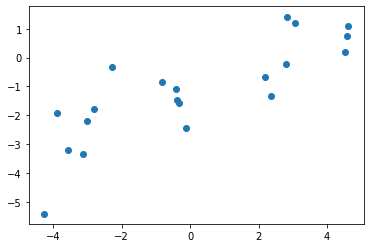

In [0]:
# Plot the data
plt.scatter(X, Y);

In [0]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [0]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [0]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [0]:
type(inputs)

torch.Tensor

In [0]:
# Train the model
n_epochs = 30
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 22.8189
Epoch 2/30, Loss: 14.2234
Epoch 3/30, Loss: 9.0066
Epoch 4/30, Loss: 5.8387
Epoch 5/30, Loss: 3.9138
Epoch 6/30, Loss: 2.7433
Epoch 7/30, Loss: 2.0312
Epoch 8/30, Loss: 1.5977
Epoch 9/30, Loss: 1.3335
Epoch 10/30, Loss: 1.1724
Epoch 11/30, Loss: 1.0742
Epoch 12/30, Loss: 1.0141
Epoch 13/30, Loss: 0.9775
Epoch 14/30, Loss: 0.9550
Epoch 15/30, Loss: 0.9413
Epoch 16/30, Loss: 0.9329
Epoch 17/30, Loss: 0.9277
Epoch 18/30, Loss: 0.9245
Epoch 19/30, Loss: 0.9226
Epoch 20/30, Loss: 0.9214
Epoch 21/30, Loss: 0.9207
Epoch 22/30, Loss: 0.9202
Epoch 23/30, Loss: 0.9199
Epoch 24/30, Loss: 0.9197
Epoch 25/30, Loss: 0.9196
Epoch 26/30, Loss: 0.9196
Epoch 27/30, Loss: 0.9195
Epoch 28/30, Loss: 0.9195
Epoch 29/30, Loss: 0.9195
Epoch 30/30, Loss: 0.9195


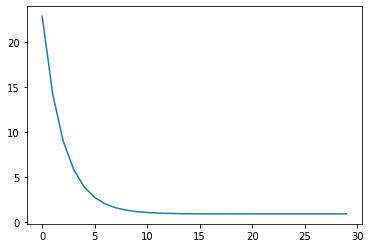

In [0]:
# Plot the loss per iteration
plt.plot(losses);

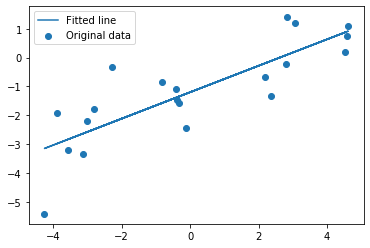

In [0]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [0]:
# Error!
model(inputs).numpy()

RuntimeError: ignored

In [0]:
# Another way
with torch.no_grad():
  out = model(inputs).numpy()
out

array([[-2.6271803 ],
       [ 0.87288046],
       [-0.19316864],
       [-1.3513957 ],
       [-2.831855  ],
       [-1.2565557 ],
       [-3.1481168 ],
       [-1.3774077 ],
       [-1.3938689 ],
       [-2.2506328 ],
       [ 0.2008456 ],
       [ 0.91473365],
       [ 0.09999967],
       [-1.5727961 ],
       [ 0.07717192],
       [-2.5789757 ],
       [-2.4867063 ],
       [-0.1144067 ],
       [ 0.89319706],
       [-2.9867918 ]], dtype=float32)

In [0]:
# Important!
# In order to test the efficacy of our model, synthetic data is useful
# Why?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.45791003]] [-1.2011197]
